In [ ]:
#pip install airtable-python-wrapper
#pip install unidecode

In [ ]:
import numpy as np
import pandas as pd
import re

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = 'iframe'
from time import sleep, time
from airtable import Airtable

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from  bs4 import BeautifulSoup
import urllib

from selenium import webdriver
from selenium.webdriver.common.by import By
#Buscar y colocar ChromeDriver en la ruta del archivo a trabajar
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

from time import sleep
from pprint import pprint

import folium
import json
from unidecode import unidecode

In [3]:
base_key = 'app3rDVq7YZmHLPMn'
table_name = 'tbl6FCpAlIrAgkpWO'
api_key = ''

airtable = Airtable(base_key, table_name, api_key)

In [4]:
records = airtable.get_all()

data = [record['fields'] for record in records]

df = pd.DataFrame(data)

In [5]:
df.loc[:, 'Producto'] = df['Producto'].apply(lambda x: x.lower())
df

,Precio,Producto,Supermercado
0,4.17,compota,eroski
1,20.53,frambuesa,ahorramas
2,2.19,limón,carrefour
3,2.99,nectarina,ahorramas
4,2.53,pera,carrefour
...,...,...,...
380,2.58,"limón,",eroski
381,6.39,kiwis,mercadona
382,3.99,"papaya,",eroski
383,3.49,papaya,eroski


In [6]:
df["Producto"] = df["Producto"].str.split().str[0]
df = df.copy()

In [7]:
df['Producto'] = df['Producto'].str.replace(',', '')
df

,Precio,Producto,Supermercado
0,4.17,compota,eroski
1,20.53,frambuesa,ahorramas
2,2.19,limón,carrefour
3,2.99,nectarina,ahorramas
4,2.53,pera,carrefour
...,...,...,...
380,2.58,limón,eroski
381,6.39,kiwis,mercadona
382,3.99,papaya,eroski
383,3.49,papaya,eroski


In [8]:
def remove_accents(input_str):
    return unidecode(input_str)

df['Producto'] = df['Producto'].apply(remove_accents)


In [9]:
palabras_diccionario = {
    "albaricoque": ("albaricoque", "albaricoques"),
    "aguacate": ("aguacate", "aguacates"),
    "arandanos": ("arandano", "arandanos"),
    "banana": ("banana", "bananas"),
    "cereza": ("cereza", "cerezas"),
    "ciruela": ("ciruela", "ciruelas"),
    "coco": ("coco", "cocos"),
    "datil": ("datil", "datiles"),
    "frambuesa": ("frambuesa", "frambuesas"),
    "fresa": ("fresa", "fresas"),
    "granada": ("granada", "granadas"),
    "grosella": ("grosella", "grosellas"),
    "higo": ("higo", "higos"),
    "kiwi": ("kiwi", "kiwis"),
    "lima": ("lima", "limas"),
    "limon": ("limon", "limones"),
    "mandarina": ("mandarina", "mandarinas"),
    "mango": ("mango", "mangos"),
    "manzana": ("manzana", "manzanas"),
    "maracuya": ("maracuya", "maracuyas"),
    "melocoton": ("melocoton", "melocotones"),
    "melon": ("melon", "melones"),
    "membrillo": ("membrillo", "membrillos"),
    "moras": ("mora", "moras"),
    "naranja": ("naranja", "naranjas"),
    "nectarina": ("nectarina", "nectarinas"),
    "papaya": ("papaya", "papayas"),
    "paraguaya": ("paraguaya", "paraguayas"),
    "pera": ("pera", "peras"),
    "pina": ("pina", "pinas"),
    "platano": ("platano", "platanos"),
    "pomelo": ("pomelo", "pomelos"),
    "sandia": ("sandia", "sandias"),
    "yuca": ("yuca", "yucas"),
    "uva": ("uva", "uvas")
}

In [10]:
def es_fruta(nombre_producto):
    for clave, palabras in palabras_diccionario.items():
        if nombre_producto in palabras:
            return clave
    return nombre_producto

In [11]:
df['Producto'] = df['Producto'].apply(es_fruta)

df = df[df['Producto'].isin(palabras_diccionario.keys())]

In [12]:
df['Producto']

1      frambuesa
2          limon
3      nectarina
4           pera
5          melon
         ...    
380        limon
381         kiwi
382       papaya
383       papaya
384         pera
Name: Producto, Length: 329, dtype: object

In [14]:
df_min_price = df.loc[df.groupby(['Producto', 'Supermercado'])['Precio'].idxmin()]
df_min_price
df_min_price.to_csv("proyecto.csv")

In [15]:
pd.set_option('display.max_rows', 200) 
df_min_price


,Precio,Producto,Supermercado
208,3.99,aguacate,ahorramas
52,2.99,aguacate,carrefour
339,3.29,aguacate,eroski
77,3.99,aguacate,mercadona
279,3.99,aguacate,supermercadosmas
255,2.49,albaricoque,ahorramas
271,3.29,albaricoque,mercadona
174,10.98,arandanos,ahorramas
111,11.51,arandanos,carrefour
275,10.98,arandanos,eroski


### Encontrar productos en los 5 supermercados

In [16]:
num_supermercados = df_min_price['Supermercado'].nunique()

productos_comunes = []
for producto in df_min_price['Producto'].unique():
    supermercados_con_producto = df_min_price[df_min_price['Producto'] == producto]['Supermercado'].nunique()
    if supermercados_con_producto == num_supermercados:
        productos_comunes.append(producto)

print("Productos disponibles en todos los supermercados:", productos_comunes)


Productos disponibles en todos los supermercados: ['aguacate', 'arandanos', 'banana', 'ciruela', 'kiwi', 'limon', 'manzana', 'melon', 'naranja', 'pera', 'pina', 'platano', 'sandia', 'uva']


In [17]:
productos_comunes

['aguacate',
 'arandanos',
 'banana',
 'ciruela',
 'kiwi',
 'limon',
 'manzana',
 'melon',
 'naranja',
 'pera',
 'pina',
 'platano',
 'sandia',
 'uva']

### Comparación de precios

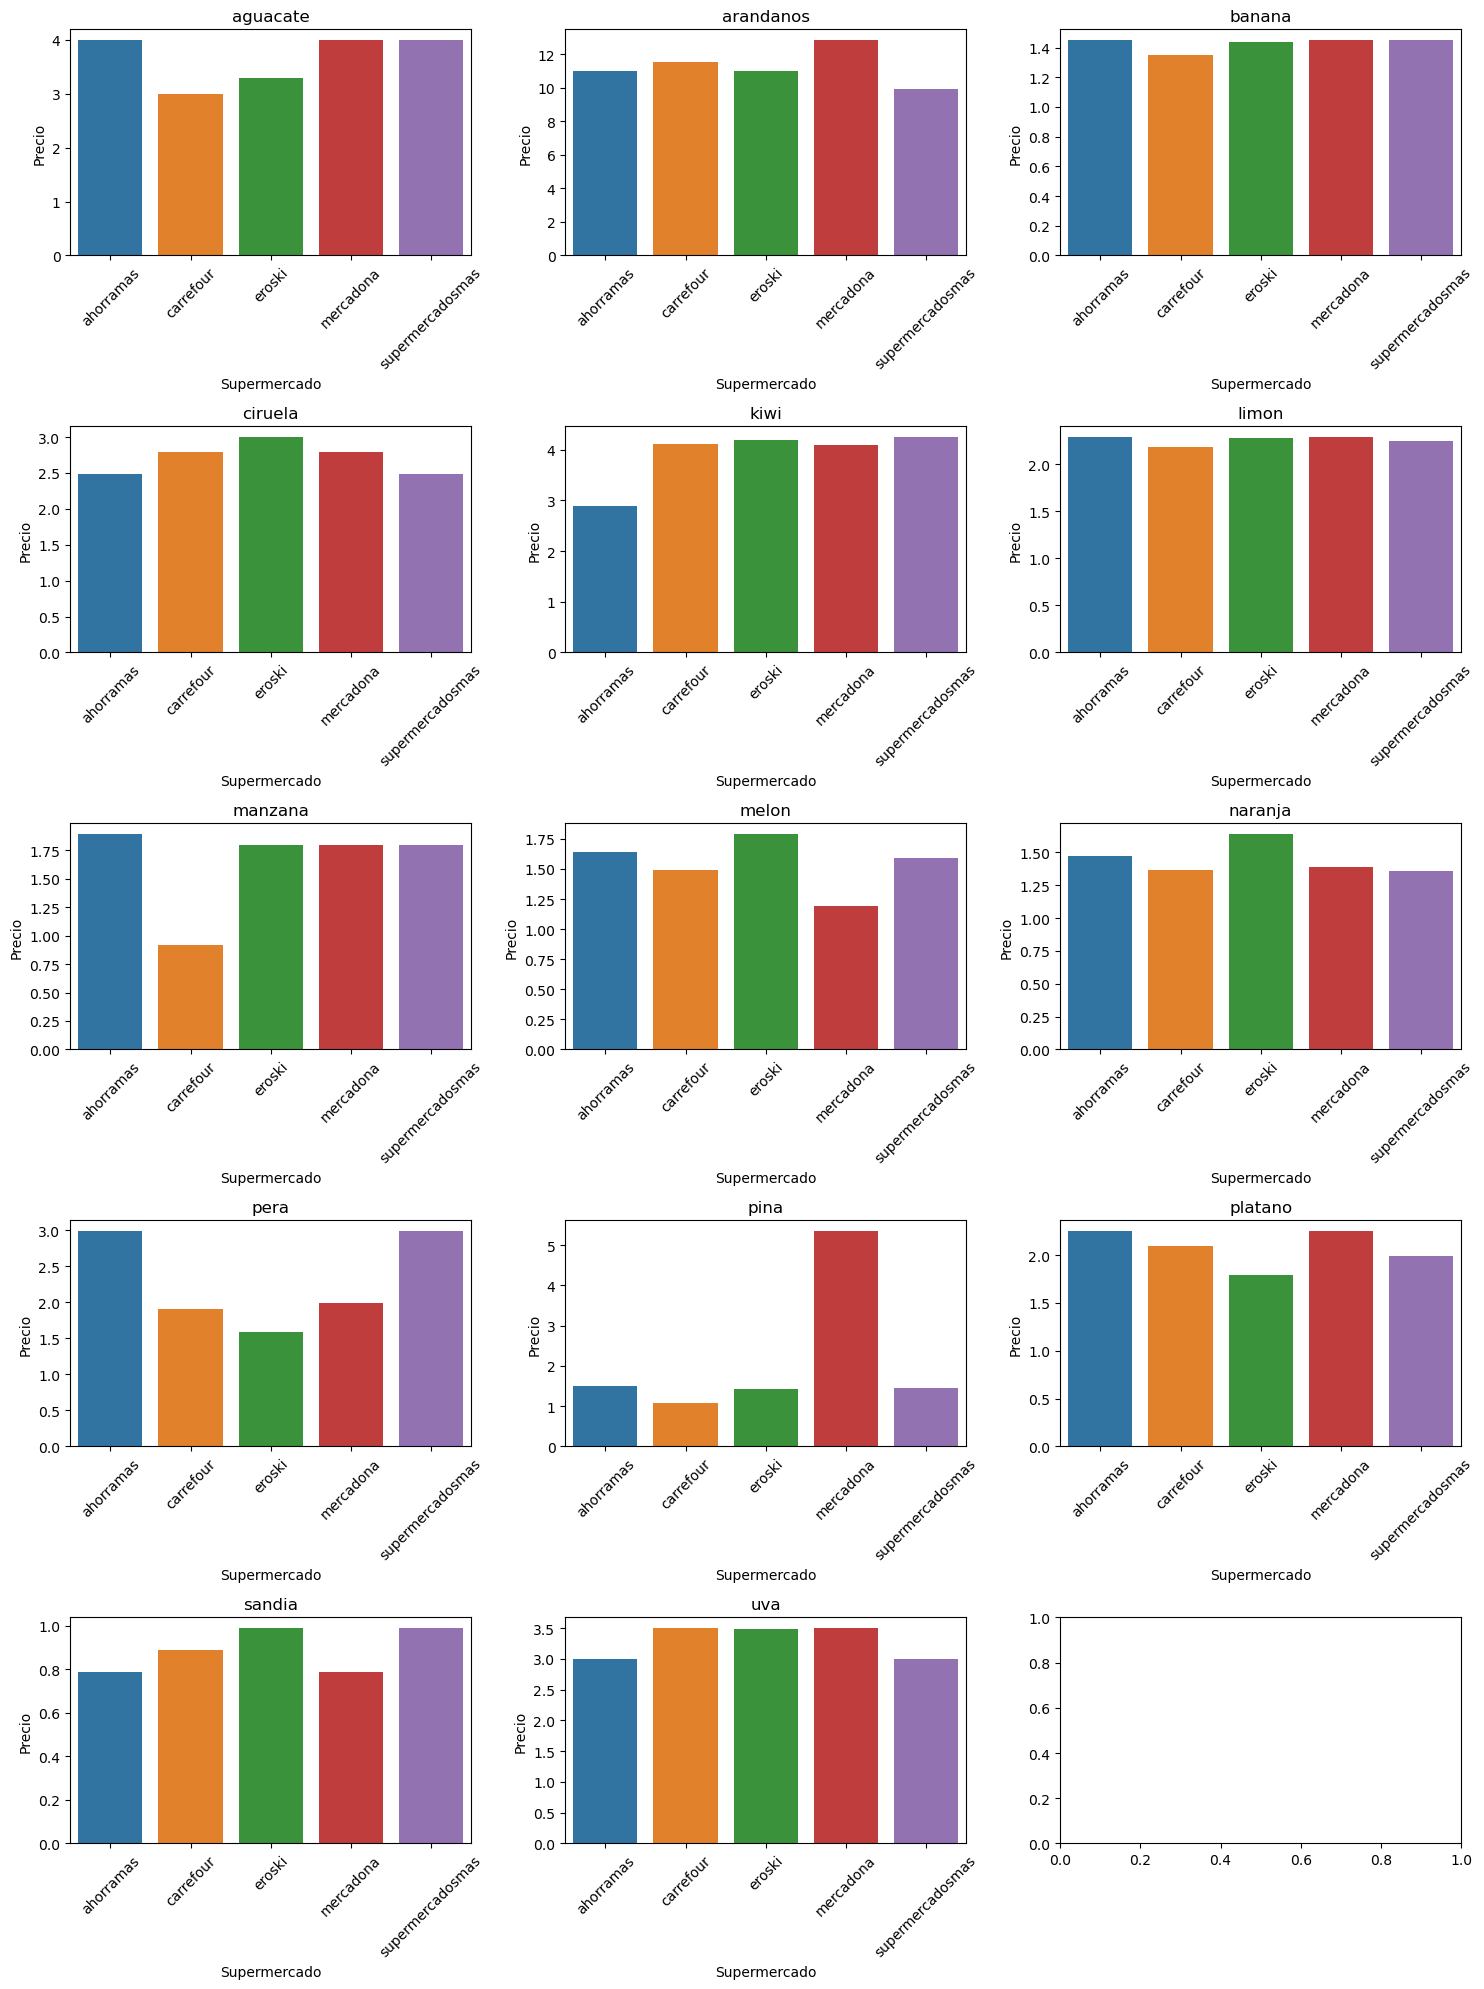

In [18]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20)) 

for index, producto_seleccionado in enumerate(productos_comunes):
    datos_producto = df_min_price[df_min_price['Producto'] == producto_seleccionado]
    row = index // 3
    col = index % 3
    ax = axes[row, col]
    sns.barplot(x='Supermercado', y='Precio', data=datos_producto, ax=ax)
    ax.set_title(f'{producto_seleccionado}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

plt.tight_layout()
plt.show()


### Precio promedio

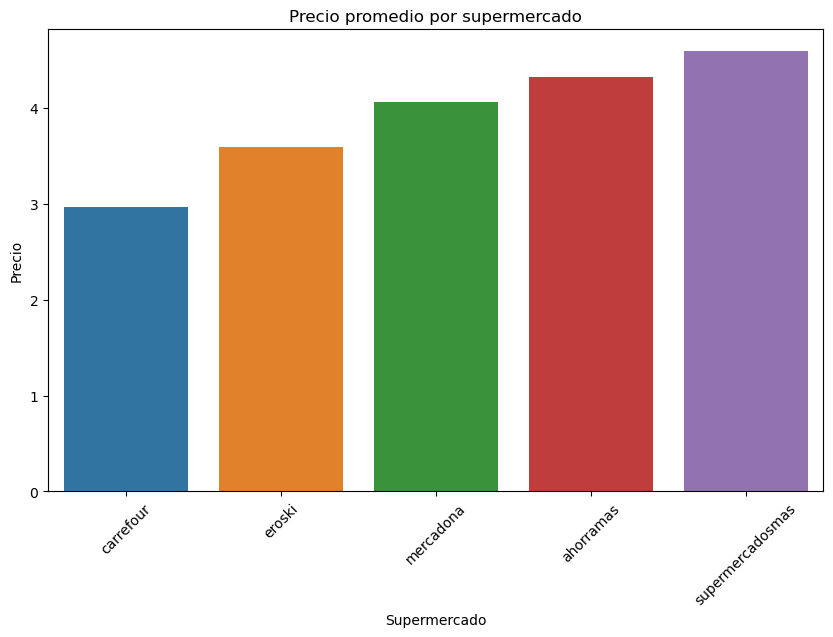

In [19]:
precios_promedio = df_min_price.groupby('Supermercado')['Precio'].mean().reset_index()

precios_promedio = precios_promedio.sort_values(by='Precio')

plt.figure(figsize=(10,6))
sns.barplot(x='Supermercado', y='Precio', data=precios_promedio)
plt.title('Precio promedio por supermercado')
plt.xticks(rotation=45)
plt.show()

### Boxplot

In [36]:
fig = go.Figure()

for supermercado in df_min_price['Supermercado'].unique():
    subset = df_min_price[df_min_price['Supermercado'] == supermercado]
    fig.add_trace(go.Box(x=subset['Supermercado'], y=subset['Precio']))

Q3 = df_min_price['Precio'].quantile(0.75)
Q1 = df_min_price['Precio'].quantile(0.25)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR

for i, row in df_min_price.iterrows():
    if row['Precio'] > upper_whisker:
        fig.add_annotation(
            x=row['Supermercado'],
            y=row['Precio'],
            text=row['Producto'],
            showarrow=False,
        )

fig.show()


### Cálculo de métricas

In [21]:
metrics_supermercado = df_min_price.groupby('Supermercado')['Precio'].agg(['max', 'min', 'mean']).reset_index()
metrics_supermercado.columns = ['Supermercado', 'Precio_Max', 'Precio_Min', 'Precio_Medio']

productos_max_min = df_min_price.loc[df_min_price.groupby('Supermercado')['Precio'].idxmax()].rename(columns={'Producto': 'Producto_Mas_Caro'})
productos_max_min['Producto_Mas_Barato'] = df_min_price.loc[df_min_price.groupby('Supermercado')['Precio'].idxmin()]['Producto'].values

metrics_supermercado = metrics_supermercado.merge(productos_max_min[['Supermercado', 'Producto_Mas_Caro', 'Producto_Mas_Barato']], on='Supermercado')

df_long = pd.melt(metrics_supermercado, id_vars=['Supermercado', 'Producto_Mas_Caro', 'Producto_Mas_Barato'], value_vars=['Precio_Max', 'Precio_Min', 'Precio_Medio'])

fig = px.bar(df_long, x='Supermercado', y='value', color='variable', barmode='group',
             title='Comparación de Precios coincidentes Máximo, Mínimo y Medio por Supermercado',
             labels={'value': 'Precio', 'variable': 'Métrica'},
             hover_data=['Producto_Mas_Caro', 'Producto_Mas_Barato'])

fig.show()

### Valores mas altos independientemente de la coincidencia

In [22]:
productos_mas_caros = df.loc[df.groupby('Supermercado')['Precio'].idxmax()]
fig = px.bar(productos_mas_caros, x='Supermercado', y='Precio', title='Producto Más Caro por Supermercado', text='Producto')

fig.show()

### Gráfico de dispersión


In [23]:
fig = px.scatter(df_min_price, x='Producto', y='Precio',
                 color='Supermercado', size='Precio',
                 title='Relación entre Frutas y Precios por Supermercado')

fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
fig.update_xaxes(categoryorder='total descending', tickangle=270)
fig.show()

### Mapa de calor del precio por supermercado

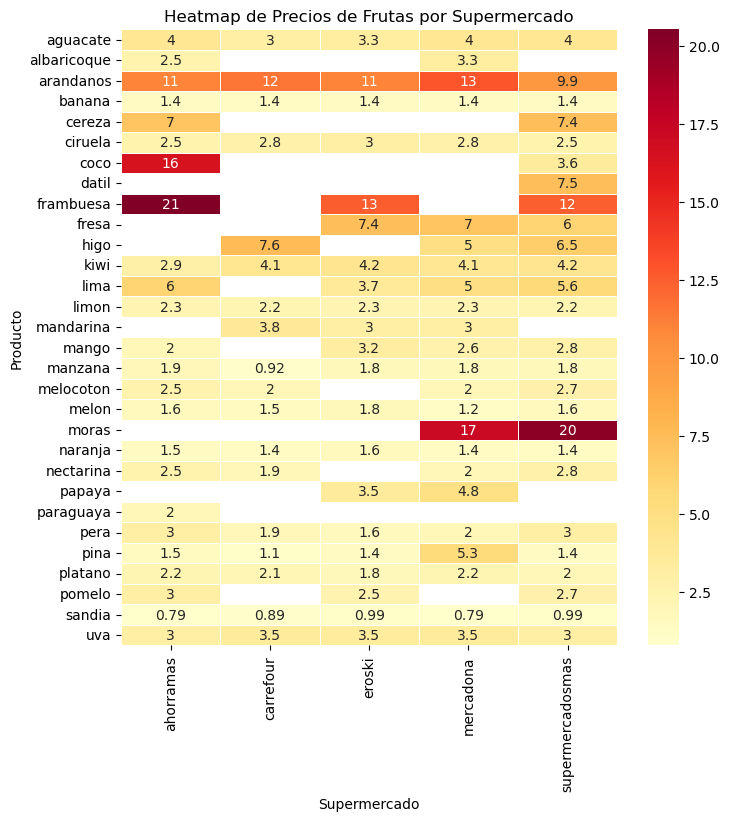

In [24]:
heatmap_data = df_min_price.pivot_table(values='Precio', index='Producto', columns='Supermercado', aggfunc='mean')

plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, linewidths=.5)

plt.title('Heatmap de Precios de Frutas por Supermercado')
plt.show()


### Los 3 productos mas caros y los 3 productos mas baratos por supermercado

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=('Tres Frutas Más Caras por Supermercado', 'Tres Frutas Más Baratas por Supermercado'))

supermercados = df_min_price['Supermercado'].unique()

for supermercado in supermercados:
    datos_supermercado = df_min_price[df_min_price['Supermercado'] == supermercado]

    seleccion_caras = datos_supermercado.sort_values('Precio', ascending=False).head(3)
    seleccion_baratas = datos_supermercado.sort_values('Precio').head(3)

    for index, row in seleccion_caras.iterrows():
        fig.add_trace(go.Bar(name=row['Producto'], x=[supermercado], y=[row['Precio']], text=row['Producto']), row=1, col=1)

    for index, row in seleccion_baratas.iterrows():
        fig.add_trace(go.Bar(name=row['Producto'], x=[supermercado], y=[row['Precio']], text=row['Producto']), row=1, col=2)

fig.update_layout(showlegend=False, barmode='stack')
fig.update_traces(texttemplate='%{text}', textposition='outside')

y_max_baratas = seleccion_caras['Precio'].max()   

fig.update_layout(yaxis2=dict(range=[0, y_max_baratas]))

fig.show()

<Axes: xlabel='Producto', ylabel='Precio'>

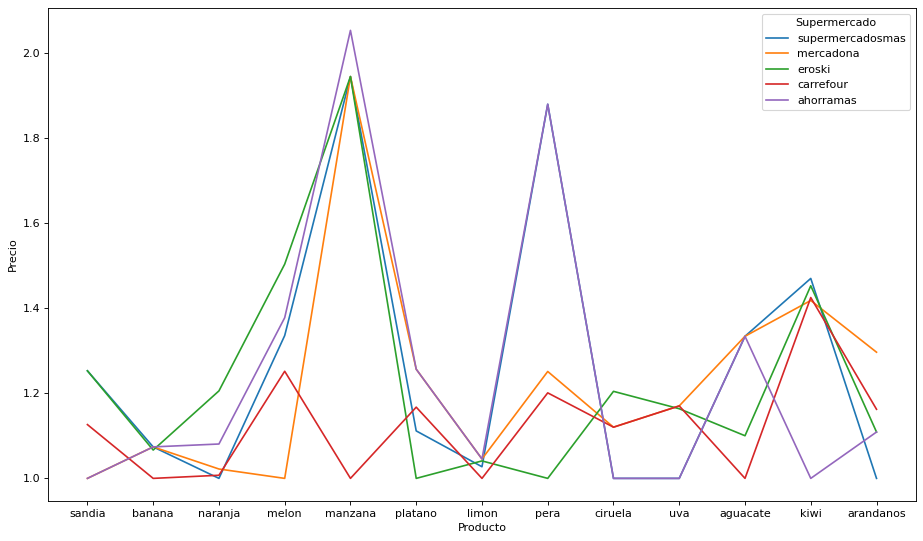

In [26]:
df = pd.read_csv("proyecto.csv")

df = df.iloc[:, 1:]
df_2 = df.copy()

productos = df['Producto'].value_counts()
coincidentes = productos[productos == 5].index
df = df.loc[df.Producto.isin(coincidentes)]

product_order = df.groupby("Producto")['Precio'].mean().sort_values().index
product_order_mapping = {product:f"{idx:02}_{product}" for idx, product in enumerate(product_order)}

df['Producto_2'] = df['Producto'].map(product_order_mapping)
df = df.sort_values(by="Producto_2")
df_norm = df.copy()

for producto in df['Producto'].unique():
    min_precio = df[df.Producto == producto]['Precio'].min()    
    df_norm.loc[df_norm['Producto'] == producto, "Precio"] = df_norm.loc[df_norm['Producto'] == producto, "Precio"] / min_precio

df_norm = df_norm.loc[df_norm['Producto'] != "pina"]
df_norm.Supermercado.unique()
df_norm_2 = df_norm.loc[df_norm.Supermercado.isin(["eroski", "carrefour"])]

plt.figure(figsize=(14, 8), dpi=80)
sns.lineplot(data=df_norm, y = "Precio", x = "Producto", hue = "Supermercado")

### Compra con 20 €

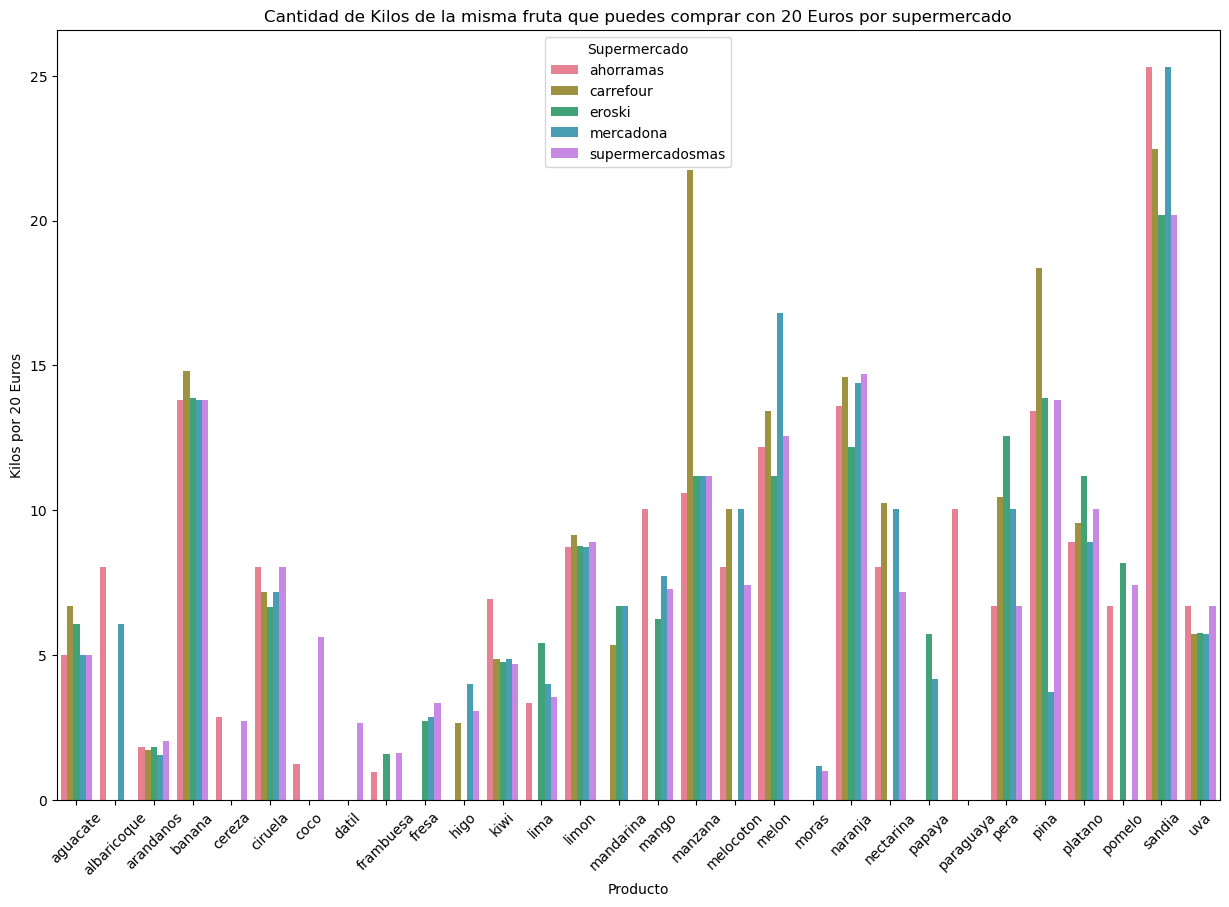

In [28]:
df_min_price['Kilos_por_20_euros'] = 20 / df_min_price['Precio']

plt.figure(figsize=(15, 10))
sns.barplot(data=df_min_price, x='Producto', y='Kilos_por_20_euros', hue='Supermercado', palette='husl')

plt.title('Cantidad de Kilos de la misma fruta que puedes comprar con 20 Euros por supermercado')
plt.ylabel('Kilos por 20 Euros')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.show()


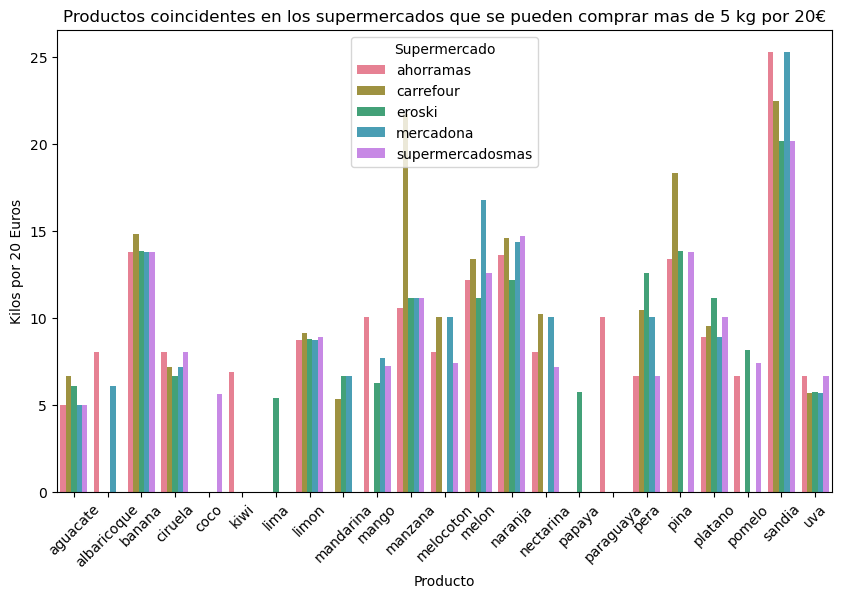

In [29]:
df_min_price['Kilos_por_20_euros'] = 20 / df_min_price['Precio']

productos_mas_5_kilos = df_min_price[df_min_price['Kilos_por_20_euros'] > 5]

plt.figure(figsize=(10, 6))
sns.barplot(data=productos_mas_5_kilos, x='Producto', y='Kilos_por_20_euros', hue='Supermercado', palette='husl')

plt.title('Productos coincidentes en los supermercados que se pueden comprar mas de 5 kg por 20€')
plt.ylabel('Kilos por 20 Euros')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.show()

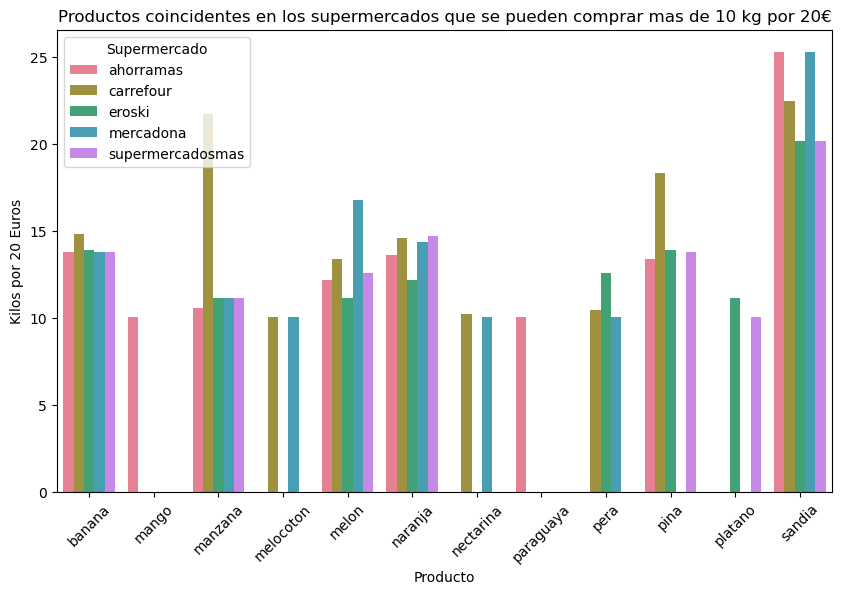

In [30]:
productos_mas_10_kilos = df_min_price[df_min_price['Kilos_por_20_euros'] > 10]

plt.figure(figsize=(10, 6))
sns.barplot(data=productos_mas_10_kilos, x='Producto', y='Kilos_por_20_euros', hue='Supermercado', palette='husl')

plt.title('Productos coincidentes en los supermercados que se pueden comprar mas de 10 kg por 20€')
plt.ylabel('Kilos por 20 Euros')
plt.xlabel('Producto')
plt.xticks(rotation=45)
plt.show()


In [31]:
supermercados = df_min_price['Supermercado'].unique()
resultado = []

for supermercado in supermercados:
    datos_supermercado = df_min_price[df_min_price['Supermercado'] == supermercado].sort_values('Precio')
    total_euros = 0
    total_productos = 0
    
    for index, row in datos_supermercado.iterrows():
        if total_euros + row['Precio'] <= 20:
            total_euros += row['Precio']
            total_productos += 1
            producto_comprado = row['Producto']
        else:
            break
    
    resultado.append((supermercado, total_productos, producto_comprado, total_euros))

resultado_df = pd.DataFrame(resultado, columns=['Supermercado', 'Total_Productos', 'Último_Producto_Comprado', 'Total_Euros'])

fig = px.bar(resultado_df, x='Supermercado', y='Total_Productos',
             title='Cantidad de productos diferentes (solo 1 kg) que puedes comprar con 20 Euros en cada Supermercado',
             labels={'Total_Productos': 'Número de Productos'},
             hover_data=['Último_Producto_Comprado', 'Total_Euros'])

fig.show()

### Cantidad de productos por tienda

In [32]:
oferta_productos = df.groupby('Supermercado')['Producto'].nunique().reset_index()
oferta_productos.rename(columns={'Producto': 'Numero_de_Productos'}, inplace=True)

fig = px.bar(oferta_productos, x='Supermercado', y='Numero_de_Productos', title='Cantidad de diferentes frutas por Supermercado')

fig.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'))

fig.show()

### Folium  

In [33]:
from urllib.parse import urlparse, parse_qs
import folium

coordenadas_supermercados = {}

urls = {
    "SupermercadoMas": "https://www.google.com/maps/place/37%C2%B016'29.4%22N+5%C2%B056'33.5%22W/@37.27483,-5.94263,16z/data=!4m4!3m3!8m2!3d37.27483!4d-5.94263?hl=es&entry=ttu",
    "Eroski": "https://www.google.com/maps?ll=43.13042,-2.55829&z=16&t=m&hl=es&gl=US&mapclient=embed&q=43%C2%B007'2749.5%22N+2%C2%B033'2729.8%22W+43.130420,+-2.558290@43.13042,-2.55829",
    "Carrefour": "https://www.google.com/maps/place/40%C2%B026'32.2%22N+3%C2%B035'01.8%22W/@40.44229,-3.58383,16z/data=!4m4!3m3!8m2!3d40.44229!4d-3.58383?hl=es&entry=ttu",
    "Ahorramas": "https://www.google.com/maps/place/40%C2%B020'38.3%22N+3%C2%B028'24.8%22W/@40.3435681,-3.4734674,15.48z/data=!4m4!3m3!8m2!3d40.343977!4d-3.473542?hl=es&entry=ttu",
    "Mercadona": "https://www.google.com/maps/place/39%C2%B030'25.6%22N+0%C2%B022'00.3%22W/@39.5071,-0.36674,16z/data=!4m4!3m3!8m2!3d39.5071!4d-0.36674?hl=es&entry=ttu"
}

for supermercado, url in urls.items():
    parsed_url = urlparse(url)
    params = parse_qs(parsed_url.query)
    if "ll" in params:
        lat_long = params["ll"][0].split(",")
        lat = float(lat_long[0])
        long = float(lat_long[1])
    else:
        lat_long = url.split("@")[1].split(",")[:2]
        lat = float(lat_long[0])
        long = float(lat_long[1])
    
    coordenadas_supermercados[supermercado] = (lat, long)
    print(f"{supermercado}: Latitud {lat}, Longitud {long}")


mapa = folium.Map(location=[40.0, -3.5], zoom_start=6)

for supermercado, (lat, long) in coordenadas_supermercados.items():
    folium.Marker(
        location=[lat, long],
        popup=supermercado,
        icon=folium.Icon(icon="shopping-cart") 
    ).add_to(mapa)

mapa.save('supermercados.html')

mapa

SupermercadoMas: Latitud 37.27483, Longitud -5.94263
Eroski: Latitud 43.13042, Longitud -2.55829
Carrefour: Latitud 40.44229, Longitud -3.58383
Ahorramas: Latitud 40.3435681, Longitud -3.4734674
Mercadona: Latitud 39.5071, Longitud -0.36674
